In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import defaultdict 

In [ ]:
!git clone https://github.com/tatnashev/prozhito

Cloning into 'prozhito'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 63 (delta 32), reused 50 (delta 22), pack-reused 0
Unpacking objects: 100% (63/63), done.


## Размечено

In [ ]:
label_list = ['B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER', 'B-FAC', 'I-FAC', 'B-CHAR', 'I-CHAR', 'O']
num2bio = dict(enumerate(label_list))

In [ ]:
def preprocess_labels(labels): 
    nums = labels.split(', ')
    nums[0] = nums[0][1:] 
    nums[-1] = nums[-1][:-1]

    return list(map(int, nums))

In [ ]:
def get_bio(bio_nums): 
    return [num2bio[elem] for elem in bio_nums]

In [ ]:
df_train = pd.read_csv('prozhito/prozhito_data/df_train_prozhito.csv') 
df_test = pd.read_csv('prozhito/prozhito_data/df_test_prozhito.csv') 
df_val = pd.read_csv('prozhito/prozhito_data/df_val_prozhito.csv') 

df_prozhito = pd.concat([df_train, df_test, df_val]) 
df_prozhito.head()

,Unnamed: 0,tokens,BIO_str,BIO_nums,BIO_list
0,0,У меня большая симпатия к Лукьянину — человек ...,O O O O O O O O O O O O O O O O O O O O O,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,2,"> Каким приговором , указом каким > Ты здесь ,...",O O O O O O O O O O O O O O O O O,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,3,"Подумал , что летом ребята куда затащили .",O O O O B-CHAR O O O,"[10, 10, 10, 10, 8, 10, 10, 10]","['O', 'O', 'O', 'O', 'B-CHAR', 'O', 'O', 'O']"
3,4,Нашел потрясающие материалы о В . М . Брадисе ...,O O O O B-PER I-PER I-PER I-PER I-PER O O B-CH...,"[10, 10, 10, 10, 4, 5, 5, 5, 5, 10, 10, 8, 8, ...","['O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER'..."
4,5,[Без даты . ],O O O O,"[10, 10, 10, 10]","['O', 'O', 'O', 'O']"


In [ ]:
def cnt_entities_razmecheno(df): 
    cnt_entities_prozhito = defaultdict(int) 
    for bio in df_prozhito['BIO_str'].values: 
        tags = bio.split() 
        for tag in tags: 
            splitted_tag = tag.split('-') 
            if splitted_tag[0] == 'B' and splitted_tag[-1] in ['LOC', 'ORG', 'PER']: 
                cnt_entities_prozhito[splitted_tag[-1]] += 1

    return cnt_entities_prozhito

In [ ]:
sns.set()

<BarContainer object of 5 artists>

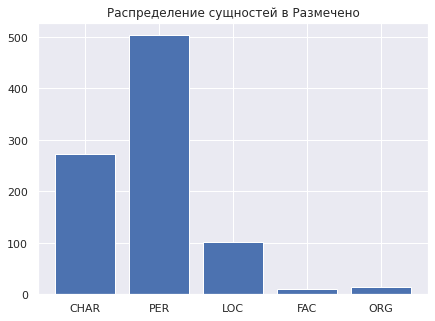

In [ ]:
f = plt.figure(figsize=(7, 5))
plt.title('Распределение сущностей в Размечено') 
plt.bar(cnt_entities.keys(), cnt_entities.values())

In [ ]:
f.savefig('razmecheno_entities.jpeg')

## Размечено и FactRu

In [ ]:
import re

In [ ]:
def preprocess_bio(bio): 
    regex = re.compile('[A-Z-]+')
    return regex.findall(bio)

In [ ]:
df_train = pd.read_csv('prozhito/data/factru_train.csv') 
df_test = pd.read_csv('prozhito/data/factru_test.csv') 
df_val = pd.read_csv('prozhito/data/factru_val.csv') 

df_factru = pd.concat([df_train, df_test, df_val])  
df_factru.head()

,tokens,BIO
0,"['Я', 'голосовал', 'против', 'увольнения', 'Фе...","['O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', '..."
1,"['Белоруссия', ',', 'Казахстан', ',', 'как', '...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,"['В', 'то', 'же', 'время', 'канцлер', 'подчерк...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,"['Спуск', 'корабля', 'с', 'орбиты', 'проходил'...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,"['Герой', 'Мураками', 'увлекается', 'западными...","['O', 'B-PER', 'O', 'O', 'O', 'O', 'O', 'O', '..."


In [ ]:
df_factru['BIO'] = df_factru['BIO'].apply(lambda x: preprocess_bio(x)) 
df_factru.head()

,tokens,BIO
0,"['Я', 'голосовал', 'против', 'увольнения', 'Фе...","[O, O, O, O, B-PER, O, O, O, O, O, B-PER, O, O..."
1,"['Белоруссия', ',', 'Казахстан', ',', 'как', '...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,"['В', 'то', 'же', 'время', 'канцлер', 'подчерк...","[O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"['Спуск', 'корабля', 'с', 'орбиты', 'проходил'...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,"['Герой', 'Мураками', 'увлекается', 'западными...","[O, B-PER, O, O, O, O, O, O, O, O]"


In [ ]:
def cnt_entities_factru(df): 
    cnt_entities = defaultdict(int) 
    for bio in df['BIO'].values: 
        for tag in bio: 
            splitted_tag = tag.split('-') 
            if splitted_tag[0] == 'B' and splitted_tag[-1] in ['LOC', 'ORG', 'PER']: 
                cnt_entities[splitted_tag[-1]] += 1

    return cnt_entities

In [ ]:
factru_entities = cnt_entities_factru(df_factru) 
razmecheno_entities = cnt_entities_razmecheno(df_prozhito)

In [ ]:
factru_entities

defaultdict(int, {'LOC': 1117, 'ORG': 2506, 'PER': 2053})

In [ ]:
razmecheno_entities

defaultdict(int, {'LOC': 102, 'ORG': 15, 'PER': 503})

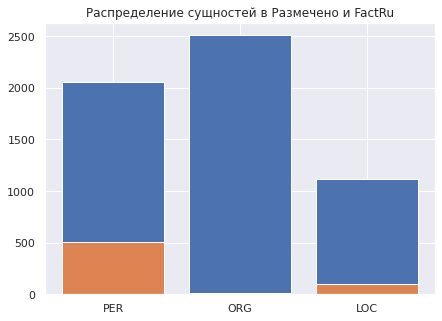

In [ ]:
f = plt.figure(figsize=(7, 5)) 
plt.title('Распределение сущностей в Размечено и FactRu')
plt.bar(factru_entities.keys(), factru_entities.values(), label='factru') 
plt.bar(razmecheno_entities.keys(), razmecheno_entities.values(), label='размечено') 
plt.show() 

In [ ]:
factru

array([7.62705742, 7.82644314, 7.0184018 ])

In [ ]:
np.log(np.array(list(razmecheno_entities.values())))

array([6.22059017, 4.62497281, 2.7080502 ])

In [ ]:
factru_entities

defaultdict(int, {'LOC': 1117, 'ORG': 2506, 'PER': 2053})

In [ ]:
X

['PER', 'LOC', 'ORG']

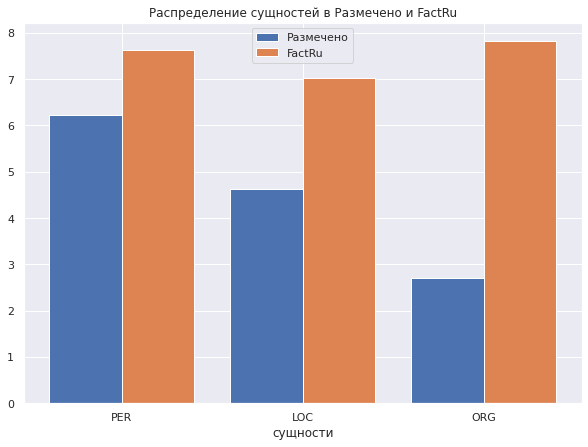

In [ ]:
f = plt.figure(figsize=(10, 7))

X = list(razmecheno_entities.keys())
razmecheno = np.log(np.array(list(razmecheno_entities.values())))
factru = np.log(np.array([2053, 1117, 2506]))
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, razmecheno, 0.4, label = 'Размечено')
plt.bar(X_axis + 0.2, factru, 0.4, label = 'FactRu')
  
plt.xticks(X_axis, X)
plt.xlabel("сущности")
plt.title("Распределение сущностей в Размечено и FactRu")
plt.legend()
plt.show()

In [ ]:
f.savefig('razmecheno_factru_entities.jpeg')

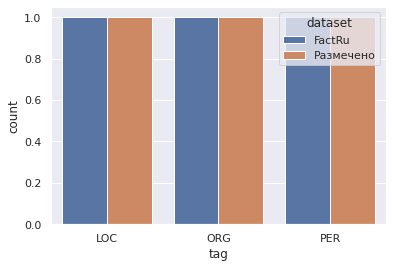

In [ ]:
to_draw = pd.DataFrame({
    'tag': ['LOC', 'ORG', 'PER', 'LOC', 'ORG', 'PER'], 
    'values': [
               factru_entities['LOC'], 
               factru_entities['ORG'], 
               factru_entities['PER'], 
               razmecheno_entities['LOC'], 
               razmecheno_entities['ORG'], 
               razmecheno_entities['PER']
    ], 
    'dataset': ['FactRu', 'FactRu', 'FactRu', 'Размечено', 'Размечено', 'Размечено']
})

sns.countplot(x='tag', hue='dataset', data=to_draw)